<a href="https://colab.research.google.com/github/jojostx/eda-with-python/blob/main/citibike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('/content/sample_data/citi_bike_trip_data.csv')

In [20]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,326,2013-10-01 00:01:08,2013-10-01 00:06:34,239,Willoughby St & Fleet St,40.691966,-73.981302,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,16052,Subscriber,1982,1
1,729,2013-10-01 00:01:21,2013-10-01 00:13:30,322,Clinton St & Tillary St,40.696192,-73.991218,398,Atlantic Ave & Furman St,40.691652,-73.999979,19412,Customer,\N,0
2,520,2013-10-01 00:01:24,2013-10-01 00:10:04,174,E 25 St & 1 Ave,40.738177,-73.977387,403,E 2 St & 2 Ave,40.725029,-73.990697,19645,Subscriber,1984,1
3,281,2013-10-01 00:01:25,2013-10-01 00:06:06,430,York St & Jay St,40.701485,-73.986569,323,Lawrence St & Willoughby St,40.692362,-73.986317,16992,Subscriber,1985,1
4,196,2013-10-01 00:01:27,2013-10-01 00:04:43,403,E 2 St & 2 Ave,40.725029,-73.990697,401,Allen St & Rivington St,40.720196,-73.989978,15690,Subscriber,1986,1


In [21]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [22]:
df.size

608625

In [23]:
df.shape

(40575, 15)

In [24]:
df.isna().sum()

,0
tripduration,0
starttime,0
stoptime,0
start station id,0
start station name,0
start station latitude,0
start station longitude,0
end station id,0
end station name,0
end station latitude,0


In [25]:
df.drop(['start station longitude', 'start station latitude', 'end station longitude', 'end station latitude'], axis=1).describe()

,tripduration,start station id,end station id,bikeid,gender
count,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000
mean,822.374640,449.396155,450.073370,17634.191547,1.137671
std,984.000376,362.462577,369.780126,1703.451047,0.527477
min,60.000000,72.000000,72.000000,14531.000000,0.000000
25%,408.000000,306.000000,305.000000,16146.000000,1.000000
50%,638.000000,405.000000,404.000000,17651.000000,1.000000
75%,1028.000000,487.000000,487.000000,19093.000000,1.000000
max,56629.000000,3002.000000,3002.000000,20664.000000,2.000000


<Axes: xlabel='tripduration', ylabel='Count'>

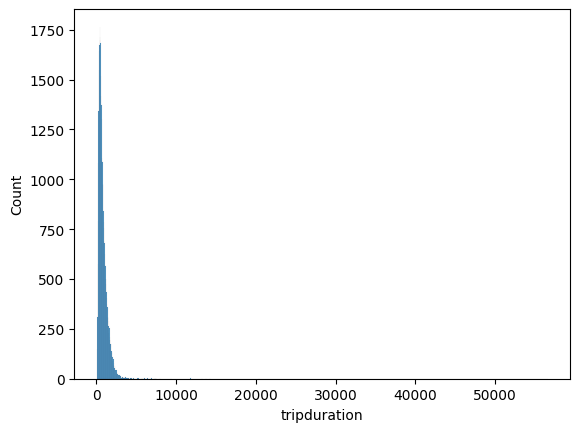

In [27]:
sns.histplot(df['tripduration'])

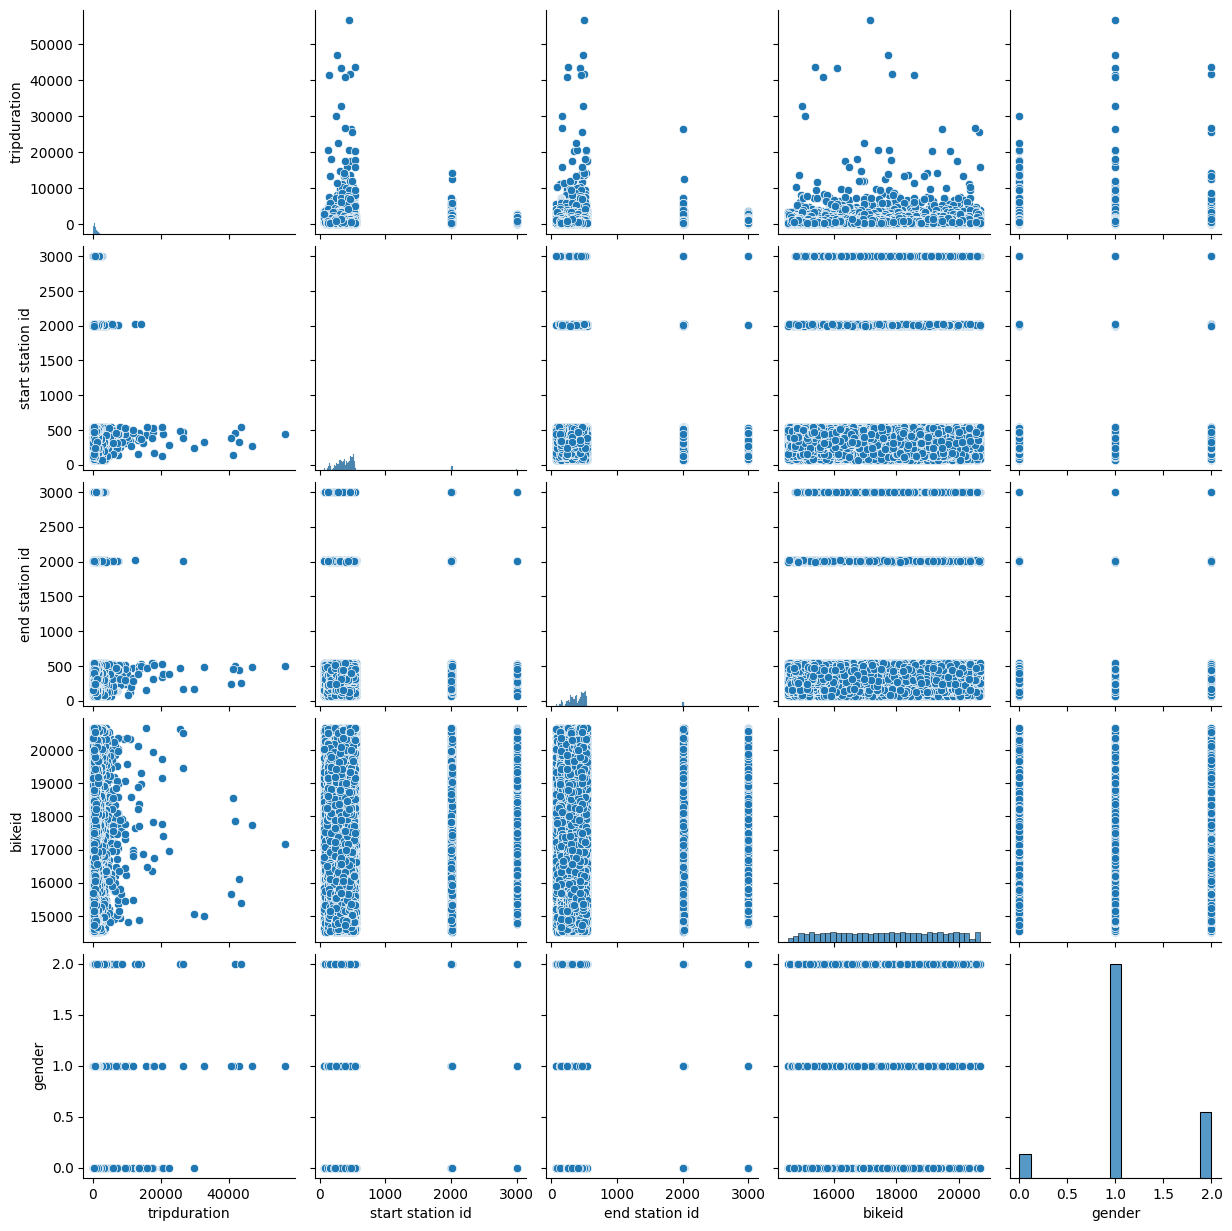

In [26]:
sns.pairplot(df.drop(['start station longitude', 'start station latitude', 'end station longitude', 'end station latitude'], axis=1))

In [28]:
print("Unique usertypes:")
display(df['usertype'].unique())

Unique usertypes:


array(['Subscriber', 'Customer'], dtype=object)

In [34]:
print("Counts by usertype:")
num_sub = df['usertype'].value_counts().get('Subscriber')
num_cust = df['usertype'].value_counts().get('Customer')
print(f"Number of Subscribers: {num_sub}")
print(f"Number of Customers: {num_cust}")

Counts by usertype:
Number of Subscribers: 37343
Number of Customers: 3232


In [38]:
print(f"{round(num_sub/len(df)*100)}% of total riders on October 1st, 2013 are annual subscribers")

92% of total riders on October 1st, 2013 are annual subscribers


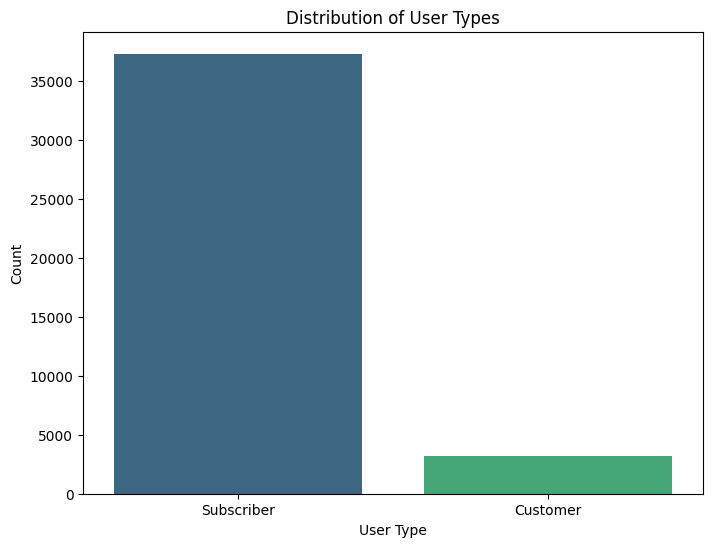

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='usertype', data=df, palette='viridis', hue='usertype')
plt.title('Distribution of User Types')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

# Q1: How does trip length vary based n trip start time

In [39]:
import datetime as dt

In [41]:
df['birth year'] = pd.to_datetime(df['birth year'], format='%Y', errors='coerce')

In [44]:
df['hour'] = df['starttime'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')).dt.hour

Text(0.5, 0, 'Hour of the Day')

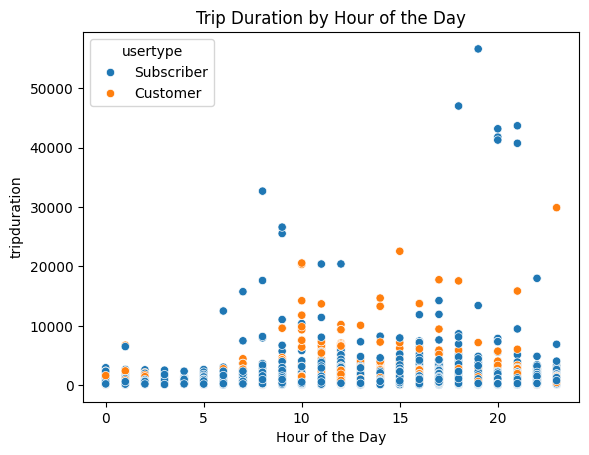

In [46]:
sns.scatterplot(x='hour', y='tripduration', data=df, hue='usertype')
plt.title('Trip Duration by Hour of the Day')
plt.xlabel('Hour of the Day')

# Q2: Which bike stations are most popular to start trips from?

In [74]:
df2 = df.groupby('start station id').size().reset_index(name='count').sort_values('count', ascending=False)

In [75]:
df2.head()

,start station id,count
290,519,603
233,459,443
82,293,379
78,285,364
270,497,347


In [76]:
temp = df.drop_duplicates('start station id')

df2 = df2.merge(
    temp[
        [
         'start station id',
         'start station name',
         'start station latitude',
         'start station longitude'
         ]
        ],
    on='start station id',
    how='left'
  )

In [55]:
%pip install folium

In [56]:
import folium as fl

In [78]:
m = fl.Map(location=[40.730610, -73.935242], tiles='OpenStreetMap', zoom_start=12)

for i in range(0, len(df2)):
    fl.Circle(
        location=[df2.iloc[i]['start station latitude'], df2.iloc[i]['start station longitude']],
        popup=df2.iloc[i]['start station name'],
        radius=float(df2.iloc[i]['count'])/2,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

m